In [96]:
import csv
import matplotlib.pyplot as plt

In [97]:
def import_csv(path):
    with open(path, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=' ', quotechar='|')
        milliseconds = float(reader.__next__()[0])
        rows = int(reader.__next__()[0])
        columns = int(reader.__next__()[0])
        nnz = int(reader.__next__()[0])
        try:
            buffer_size = int(reader.__next__()[0])  # Bytes
        except:
            buffer_size = 0
        
    return milliseconds, rows, columns, nnz, buffer_size

In [98]:
execution_times_cusparse = []
nnz_array = []
buffer_array = []
row_array = []
column_array = []

for i in range(1, 11):
    ms, rows, columns, nnz, bf = import_csv(f'../output/csr_cusparse_{i}.csv')
    execution_times_cusparse.append(ms)
    nnz_array.append(nnz)
    buffer_array.append(bf)
    row_array.append(rows)
    column_array.append(columns)

print(execution_times_cusparse)
print(nnz_array)
print(buffer_array)
print(row_array)
print(column_array)

[0.052055, 0.0456115, 0.0506256, 0.108175, 0.0452605, 0.0644886, 0.0453818, 0.045511, 0.0634218, 0.0454656]
[2934, 998, 4282, 9613, 1726, 1677, 1041, 2400, 2480, 2934]
[24497, 9009, 35281, 158823, 14833, 17547, 11339, 20225, 20865, 24497]
[768, 183, 541, 1224, 663, 1096, 638, 600, 512, 768]
[768, 183, 541, 1224, 663, 1096, 638, 600, 512, 768]


In [99]:
execution_times_coo = []
for i in range(1, 11):
    ms, rows, columns, nnz, _ = import_csv(f'../output/csr_coo_own_{i}.csv')
    execution_times_coo.append(ms)
    
print(execution_times_coo)

[1.30161, 0.221962, 1.09756, 5.64427, 0.575204, 1.02027, 0.347197, 0.679116, 0.602939, 1.01257]


In [100]:
execution_times_csc = []
for i in range(1, 11):
    ms, rows, columns, nnz, _ = import_csv(f'../output/csr_csc_own_{i}.csv')
    execution_times_csc.append(ms)
    
print(execution_times_csc)

[1.17963, 0.257765, 1.15406, 5.83023, 0.459315, 0.820085, 0.29483, 0.745797, 0.595646, 0.897398]


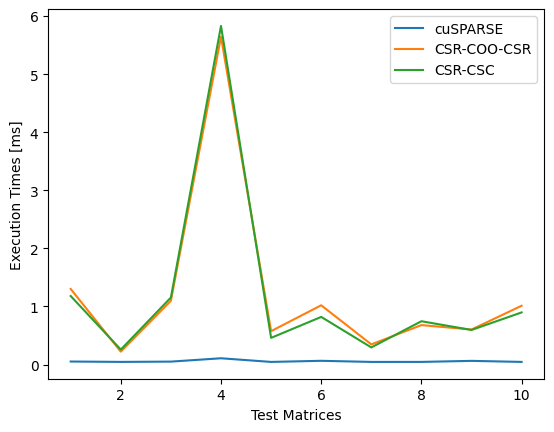

In [101]:
plt.figure()
plt.xlabel("Test Matrices")
plt.ylabel("Execution Times [ms]")
plt.plot(range(1, 11), execution_times_cusparse, label="cuSPARSE")
plt.plot(range(1, 11), execution_times_coo, label="CSR-COO-CSR")
plt.plot(range(1, 11), execution_times_csc, label="CSR-CSC")
plt.legend()

In [102]:
def effective_bandwidth(time, bytes):
    time *= 1e-3  # ms to s
    return ((bytes) / 1e9) / time

In [103]:
eb_cusparse = []
eb_coo = []
eb_csc = []

for i in range(0, 10):
    bytes = row_array[i] * column_array[i] * 4 * 2
    eb_cusparse.append(effective_bandwidth(execution_times_cusparse[i], bytes))
    eb_coo.append(effective_bandwidth(execution_times_coo[i], bytes))
    eb_csc.append(effective_bandwidth(execution_times_csc[i], bytes))
    
print(eb_cusparse)
print(eb_coo)
print(eb_csc)

[90.64627797521852, 5.8737818313363945, 46.250276539932365, 110.79646868500114, 77.69582748754432, 149.0143684310095, 71.75458002987982, 63.28140449561644, 33.0667373048384, 103.78378378378378]
[3.6251964874271096, 1.2070174173957704, 2.1333211851743865, 2.1234646818809164, 6.113573619098615, 9.418808746704304, 9.378975048747542, 4.240807166964112, 3.4782158725841255, 4.660015603859486]
[4.000061036087586, 1.0393653133668261, 2.02887891444119, 2.05573502246052, 7.656079161359852, 11.717965820616154, 11.044846182545875, 3.8616406341135723, 3.5208026243775667, 5.258081698421435]


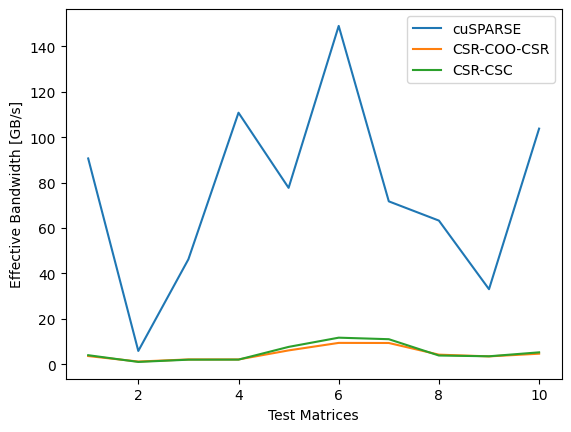

In [106]:
plt.figure()
plt.xlabel("Test Matrices")
plt.ylabel("Effective Bandwidth [GB/s]")
plt.plot(range(1, 11), eb_cusparse, label="cuSPARSE")
plt.plot(range(1, 11), eb_coo, label="CSR-COO-CSR")
plt.plot(range(1, 11), eb_csc, label="CSR-CSC")
#plt.plot(range(1, 11), [933]*10, label="Max. Bandwidth")
plt.legend()